#### Carregamento e visualizações iniciais

In [ ]:
url = 'https://raw.githubusercontent.com/Mirlaa/regressao-arvores/main/dados_curso/entregas.csv'

url_teste = 'https://raw.githubusercontent.com/Mirlaa/regressao-arvores/main/dados_curso/teste_entregas.csv'

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dados = pd.read_csv(url)

In [ ]:
dados.head(2)

,id_cliente,nome_artista,reputacao_artista,altura,largura,peso,material,preco_escultura,preco_base_envio,internacional,envio_expresso,instalacao_incluida,transporte,fragil,pedido_extra_cliente,localizacao_remota,data_agendada,data_entrega,custo
0,e9dff114-bc2b-47e9-9f5c-669e32ad9bbe,Billy Jenkins,0.26,5.1816,1.8288,1872.427776,Latão,73027.5,85.4175,Sim,Sim,Não,Aéreo,Não,Sim,Não,07/06/19,03/06/19,1487.2725
1,ba3b707f-b123-4eec-93f4-1fbebfe72b68,Jean Bryant,0.28,0.9144,0.9144,27.669112,Latão,35857.5,78.7500,Não,Não,Não,Rodoviário,Não,Sim,Não,06/03/21,05/03/21,839.7900


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4462 entries, 0 to 4461
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_cliente            4462 non-null   object 
 1   nome_artista          4462 non-null   object 
 2   reputacao_artista     4462 non-null   float64
 3   altura                4462 non-null   float64
 4   largura               4462 non-null   float64
 5   peso                  4462 non-null   float64
 6   material              4462 non-null   object 
 7   preco_escultura       4462 non-null   float64
 8   preco_base_envio      4462 non-null   float64
 9   internacional         4462 non-null   object 
 10  envio_expresso        4462 non-null   object 
 11  instalacao_incluida   4462 non-null   object 
 12  transporte            4462 non-null   object 
 13  fragil                4462 non-null   object 
 14  pedido_extra_cliente  4462 non-null   object 
 15  localizacao_remota   

In [ ]:
dados.isnull().sum()

,0
id_cliente,0
nome_artista,0
reputacao_artista,0
altura,0
largura,0
peso,0
material,0
preco_escultura,0
preco_base_envio,0
internacional,0


In [ ]:
dados.describe()

,reputacao_artista,altura,largura,peso,preco_escultura,preco_base_envio,custo
count,4462.000000,4462.000000,4462.000000,4462.000000,4462.000000,4462.000000,4462.000000
mean,0.458473,5.724324,2.512243,1144.447383,56626.568243,135.016187,2382.211538
std,0.249952,3.310070,1.316231,1425.647007,80086.391482,105.584445,2714.821323
min,0.000000,0.914400,0.609600,1.360776,15750.000000,52.500000,451.867500
25%,0.270000,3.048000,1.524000,149.685360,23730.000000,76.545000,999.757500
50%,0.461850,5.486400,2.438400,559.732528,31237.500000,101.351250,1488.427500
75%,0.640000,7.620000,3.048000,1407.042384,46777.500000,125.212500,2597.647500
max,1.000000,22.250400,11.277600,6897.319952,850237.500000,524.895000,24783.937500


In [ ]:
dados.columns

Index(['id_cliente', 'nome_artista', 'reputacao_artista', 'altura', 'largura',
       'peso', 'material', 'preco_escultura', 'preco_base_envio',
       'internacional', 'envio_expresso', 'instalacao_incluida', 'transporte',
       'fragil', 'pedido_extra_cliente', 'localizacao_remota', 'data_agendada',
       'data_entrega', 'custo'],
      dtype='object')

#### Visualizações

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dados.columns

Index(['id_cliente', 'nome_artista', 'reputacao_artista', 'altura', 'largura',
       'peso', 'material', 'preco_escultura', 'preco_base_envio',
       'internacional', 'envio_expresso', 'instalacao_incluida', 'transporte',
       'fragil', 'pedido_extra_cliente', 'localizacao_remota', 'data_agendada',
       'data_entrega', 'custo'],
      dtype='object')

In [ ]:
dados['internacional'].unique()

array(['Sim', 'Não'], dtype=object)

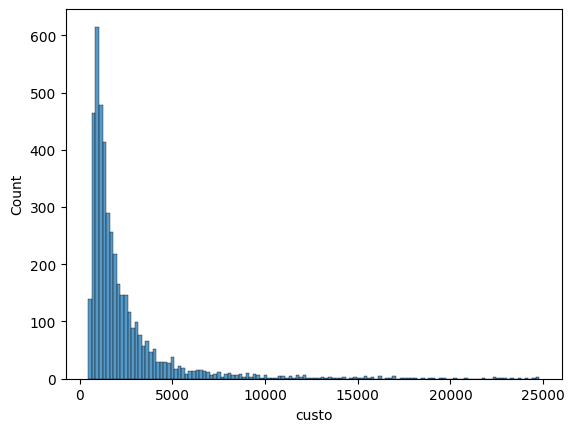

In [ ]:
sns.histplot(dados['custo']);

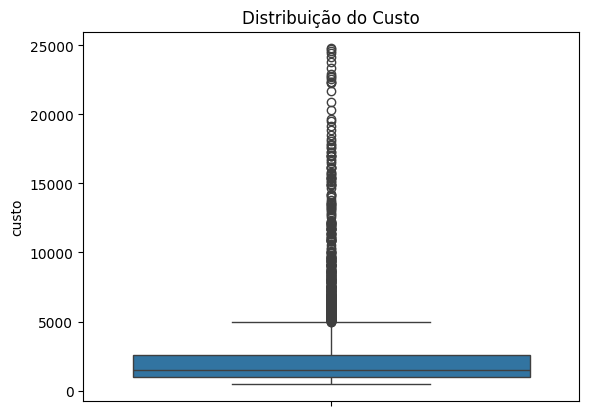

In [ ]:
sns.boxplot(dados['custo'])
plt.title('Distribuição do Custo');

In [ ]:
dados['peso'].describe()

,peso
count,4462.000000
mean,1144.447383
std,1425.647007
min,1.360776
25%,149.685360
50%,559.732528
75%,1407.042384
max,6897.319952


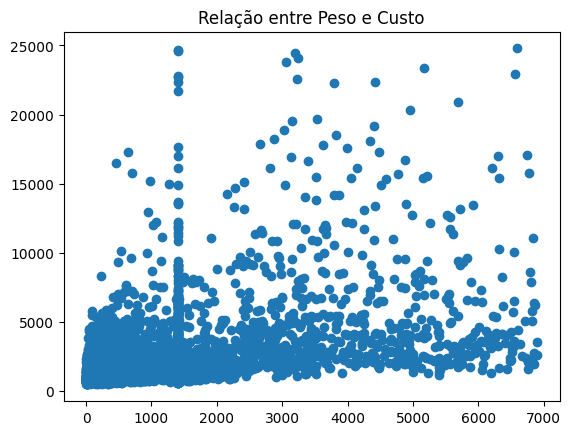

In [ ]:
plt.scatter(x = dados['peso'], y = dados['custo'])
plt.title('Relação entre Peso e Custo');

In [ ]:
dados['faixa_peso'] = pd.cut(dados['peso'], bins = 3, labels = ['Pequeno', 'Médio', 'Grande'])

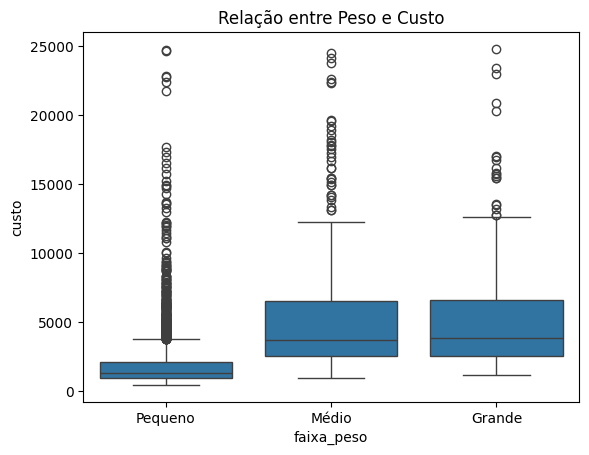

In [ ]:
sns.boxplot(data = dados.query('internacional == "Não"'), x = dados['faixa_peso'], y = dados['custo'])
plt.title('Relação entre Peso e Custo');

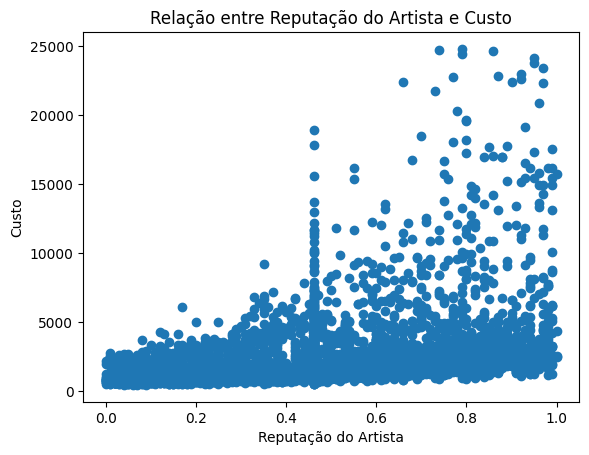

In [ ]:
plt.scatter(x = dados['reputacao_artista'], y = dados['custo'])
plt.xlabel('Reputação do Artista')
plt.ylabel('Custo')
plt.title('Relação entre Reputação do Artista e Custo');

In [ ]:
dados['faixas_reputacao'] = pd.cut(dados['reputacao_artista'], bins = 3, labels = ['Baixa', 'Média', 'Alta'])

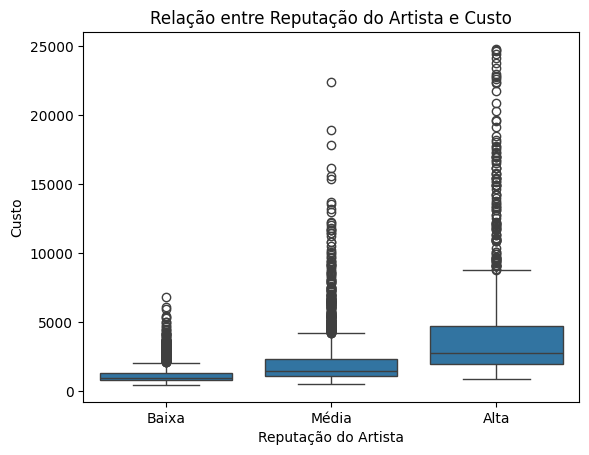

In [ ]:
sns.boxplot(x = dados['faixas_reputacao'], y = dados['custo'])
plt.xlabel('Reputação do Artista')
plt.ylabel('Custo')
plt.title('Relação entre Reputação do Artista e Custo');

#### Tratando valores de Data - Encoding

In [ ]:
df = dados.copy()

In [ ]:
df['data_agendada'] = pd.to_datetime(df['data_agendada'], format = '%d/%m/%y')

In [ ]:
df['data_entrega'] = pd.to_datetime(df['data_entrega'], format = '%d/%m/%y')

In [ ]:
df['diferenca_dias_entrega'] = (df['data_entrega'] - df['data_agendada']).dt.days

In [ ]:
df['data_agendada_dias'] = df['data_agendada'].dt.day
df['data_agendada_mes'] = df['data_agendada'].dt.month
df['data_agendada_ano'] = df['data_agendada'].dt.year

In [ ]:
df['data_entrega_dias'] = df['data_entrega'].dt.day
df['data_entrega_mes'] = df['data_entrega'].dt.month
df['data_entrega_ano'] = df['data_entrega'].dt.year

In [ ]:
df.drop(columns = ['data_agendada', 'data_entrega'], inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4462 entries, 0 to 4461
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id_cliente              4462 non-null   object  
 1   nome_artista            4462 non-null   object  
 2   reputacao_artista       4462 non-null   float64 
 3   altura                  4462 non-null   float64 
 4   largura                 4462 non-null   float64 
 5   peso                    4462 non-null   float64 
 6   material                4462 non-null   object  
 7   preco_escultura         4462 non-null   float64 
 8   preco_base_envio        4462 non-null   float64 
 9   internacional           4462 non-null   object  
 10  envio_expresso          4462 non-null   object  
 11  instalacao_incluida     4462 non-null   object  
 12  transporte              4462 non-null   object  
 13  fragil                  4462 non-null   object  
 14  pedido_extra_cliente    

In [ ]:
colunas_categoricas = ['id_cliente', 'nome_artista', 'material', 'internacional', 'envio_expresso', 'instalacao_incluida', 'transporte', 'fragil', 'pedido_extra_cliente','localizacao_remota']

for column in colunas_categoricas:
    unique_values = df[column].unique()
    print(f"Valores únicos na coluna '{column}' \n {len(unique_values)} valores:")
    print(unique_values)
    print('=='*45)

Valores únicos na coluna 'id_cliente' 
 4462 valores:
['e9dff114-bc2b-47e9-9f5c-669e32ad9bbe'
 'ba3b707f-b123-4eec-93f4-1fbebfe72b68'
 'c4212086-3e22-489e-bc2e-0d5092ef0526' ...
 'e1004685-9047-4f34-9103-57d900716936'
 'a380ff88-2c96-4d70-919a-af0bc8caeed7'
 '26fea648-9cc1-4a2b-9458-0b2d35957803']
Valores únicos na coluna 'nome_artista' 
 4441 valores:
['Billy Jenkins' 'Jean Bryant' 'Laura Miller' ... 'William Curry'
 'Karen Bayles' 'Denise Worth']
Valores únicos na coluna 'material' 
 8 valores:
['Latão' 'Argila' 'Alumínio' 'Madeira' 'Bronze' 'Pedra' 'Não especificado'
 'Mármore']
Valores únicos na coluna 'internacional' 
 2 valores:
['Sim' 'Não']
Valores únicos na coluna 'envio_expresso' 
 2 valores:
['Sim' 'Não']
Valores únicos na coluna 'instalacao_incluida' 
 2 valores:
['Não' 'Sim']
Valores únicos na coluna 'transporte' 
 4 valores:
['Aéreo' 'Rodoviário' 'Não especificado' 'Aquaviário']
Valores únicos na coluna 'fragil' 
 2 valores:
['Não' 'Sim']
Valores únicos na coluna 'pedido_

In [ ]:
colunas_categoricas = ['material', 'internacional', 'envio_expresso', 'instalacao_incluida', 'transporte', 'fragil', 'pedido_extra_cliente', 'localizacao_remota']

df = pd.get_dummies(df,
                    columns = colunas_categoricas,
                    prefix = colunas_categoricas,
                    drop_first = True)

In [ ]:
df.drop(columns = ['id_cliente', 'nome_artista'], inplace = True)

In [ ]:
df.head()

,reputacao_artista,altura,largura,peso,preco_escultura,preco_base_envio,custo,faixa_peso,faixas_reputacao,diferenca_dias_entrega,...,material_Pedra,internacional_Sim,envio_expresso_Sim,instalacao_incluida_Sim,transporte_Aéreo,transporte_Não especificado,transporte_Rodoviário,fragil_Sim,pedido_extra_cliente_Sim,localizacao_remota_Sim
0,0.26,5.1816,1.8288,1872.427776,73027.5,85.4175,1487.2725,Pequeno,Baixa,-4,...,False,True,True,False,True,False,False,False,True,False
1,0.28,0.9144,0.9144,27.669112,35857.5,78.7500,839.7900,Pequeno,Baixa,-1,...,False,False,False,False,False,False,True,False,True,False
2,0.07,2.4384,1.5240,107.501304,26040.0,111.1950,810.0225,Pequeno,Baixa,-1,...,False,False,False,False,False,False,True,True,True,True
3,0.12,2.7432,2.4384,1407.042384,30502.5,85.6275,846.0900,Pequeno,Baixa,-4,...,False,False,False,False,False,True,False,False,False,True
4,0.15,5.1816,1.8288,146.963808,16695.0,62.6850,835.9575,Pequeno,Baixa,-4,...,False,True,True,True,True,False,False,False,True,False


#### Preparação dos dados e construção do modelo

In [ ]:
import sklearn

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop(columns = ['custo', 'faixa_peso', 'faixas_reputacao'])
y = df['custo']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 45)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3569, 29), (893, 29), (3569,), (893,))

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtr = DecisionTreeRegressor(random_state = 45)

In [ ]:
dtr.fit(x_train, y_train)

DecisionTreeRegressor(random_state=45)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
y_pred = dtr.predict(x_test)

In [ ]:
def regression_report(y_true, y_pred):
  print('__________________________')
  print('\nR²: {:.2f} %'.format(r2_score(y_true, y_pred) * 100))
  print('\nMAE: {:.2f}'.format(mean_absolute_error(y_true, y_pred)))
  print('\nMSE: {:.2f}'.format(mean_squared_error(y_true, y_pred)))
  print('\nRMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_true, y_pred))))
  print('__________________________')

In [ ]:
y_pred_train = dtr.predict(x_train)

In [ ]:
regression_report(y_train, y_pred_train)

__________________________

R²: 100.00 %

MAE: 0.00

MSE: 0.00

RMSE: 0.00
__________________________


In [ ]:
print(regression_report(y_test, y_pred))

__________________________

R²: 67.68 %

MAE: 682.69

MSE: 2271849.69

RMSE: 1507.27
__________________________
None


In [ ]:
print(f"Número de nós: {dtr.tree_.node_count}")
print(f"Número de folhas: {dtr.tree_.n_leaves}")
print(f"Profundidade máxima: {dtr.tree_.max_depth}")

Número de nós: 7135
Número de folhas: 3568
Profundidade máxima: 30


In [ ]:
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 45,
 'splitter': 'best'}

In [ ]:
from sklearn.tree import plot_tree

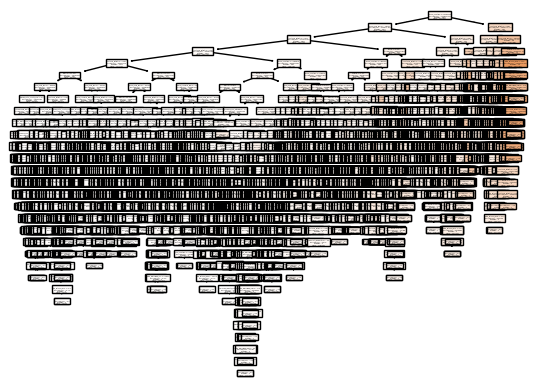

In [ ]:
tree = plot_tree(dtr, feature_names = x.columns, filled = True)

In [ ]:
dtr.feature_names_in_

array(['reputacao_artista', 'altura', 'largura', 'peso',
       'preco_escultura', 'preco_base_envio', 'diferenca_dias_entrega',
       'data_agendada_dias', 'data_agendada_mes', 'data_agendada_ano',
       'data_entrega_dias', 'data_entrega_mes', 'data_entrega_ano',
       'material_Argila', 'material_Bronze', 'material_Latão',
       'material_Madeira', 'material_Mármore',
       'material_Não especificado', 'material_Pedra', 'internacional_Sim',
       'envio_expresso_Sim', 'instalacao_incluida_Sim',
       'transporte_Aéreo', 'transporte_Não especificado',
       'transporte_Rodoviário', 'fragil_Sim', 'pedido_extra_cliente_Sim',
       'localizacao_remota_Sim'], dtype=object)

In [ ]:
dtr.feature_importances_

array([2.95041770e-01, 4.31193079e-02, 3.69397723e-02, 2.60943830e-02,
       3.85409075e-01, 1.48656853e-01, 1.17369100e-02, 1.07412375e-02,
       3.03126515e-03, 2.58205905e-03, 1.13139912e-02, 3.24455816e-03,
       1.22249763e-03, 6.54720930e-04, 2.86625309e-04, 9.10796028e-04,
       1.00064336e-04, 5.15460725e-04, 6.42873761e-04, 1.01696465e-05,
       7.37647663e-04, 5.81426736e-03, 2.24288656e-03, 2.12401453e-03,
       4.22502136e-04, 3.54267795e-04, 4.12407522e-03, 1.11812842e-03,
       8.07819173e-04])

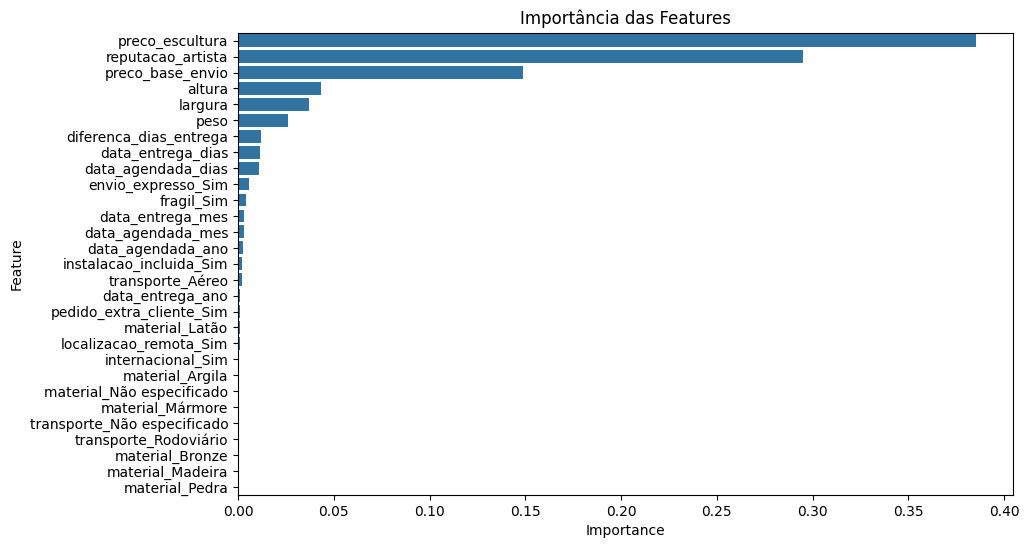

In [ ]:
importances = pd.DataFrame(
    {'Importance': dtr.feature_importances_,
     'Feature': dtr.feature_names_in_}
).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (10, 6))
bars = sns.barplot(x = 'Importance', y = 'Feature', data = importances)
plt.title('Importância das Features');

#### Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold

In [ ]:
cv = KFold(n_splits = 5, shuffle = True, random_state = 45)

In [ ]:
param_grid = {
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [6, 8, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [5, 10, 15],
    'max_leaf_nodes': [None, 100, 500]
}

In [ ]:
grid_search = GridSearchCV(dtr,
                           param_grid,
                           cv = cv,
                           scoring = 'r2',
                           n_jobs = -1)

In [ ]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=45, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=45), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [6, 8, 10, 15],
                         'max_leaf_nodes': [None, 100, 500],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [ ]:
best_params = grid_search.best_params_

In [ ]:
best_params

{'criterion': 'squared_error',
 'max_depth': 10,
 'max_leaf_nodes': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'splitter': 'best'}

In [ ]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=10, min_samples_leaf=5, random_state=45)

In [ ]:
dtr2 = DecisionTreeRegressor(**best_params)

In [ ]:
dtr2.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)

In [ ]:
print(f"Número de nós: {dtr2.tree_.node_count}")
print(f"Número de folhas: {dtr2.tree_.n_leaves}")
print(f"Profundidade máxima: {dtr2.tree_.max_depth}")

Número de nós: 537
Número de folhas: 269
Profundidade máxima: 10


In [ ]:
y_pred = dtr2.predict(x_test)

In [ ]:
regression_report(y_test, y_pred)

__________________________

R²: 75.07 %

MAE: 591.84

MSE: 1752331.88

RMSE: 1323.76
__________________________


In [ ]:
regression_report(y_train, dtr2.predict(x_train))

__________________________

R²: 91.78 %

MAE: 394.14

MSE: 612275.24

RMSE: 782.48
__________________________


##### Cross Validate

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
resultados = cross_validate(
    dtr2,
    x,
    y,
    cv = cv,
    scoring = 'neg_mean_squared_error',
    return_train_score = True)

In [ ]:
resultados.keys()

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])

In [ ]:
treino_rmse = np.sqrt(-resultados['train_score'])
teste_rmse = np.sqrt(-resultados['test_score'])

print('RMSE Treino: {}'.format(treino_rmse))
print('RMSE Teste: {}'.format(teste_rmse))
print('Média Treino RMSE {:.2f}'.format(treino_rmse.mean()))
print('Média Teste RMSE {:.2f}'.format(teste_rmse.mean()))

RMSE Treino: [782.48018783 833.80477686 765.92768921 791.18177415 798.71583724]
RMSE Teste: [1320.25497587 1542.28303248 1436.50183309 1433.91792928 1497.84617023]
Média Treino RMSE 794.42
Média Teste RMSE 1446.16


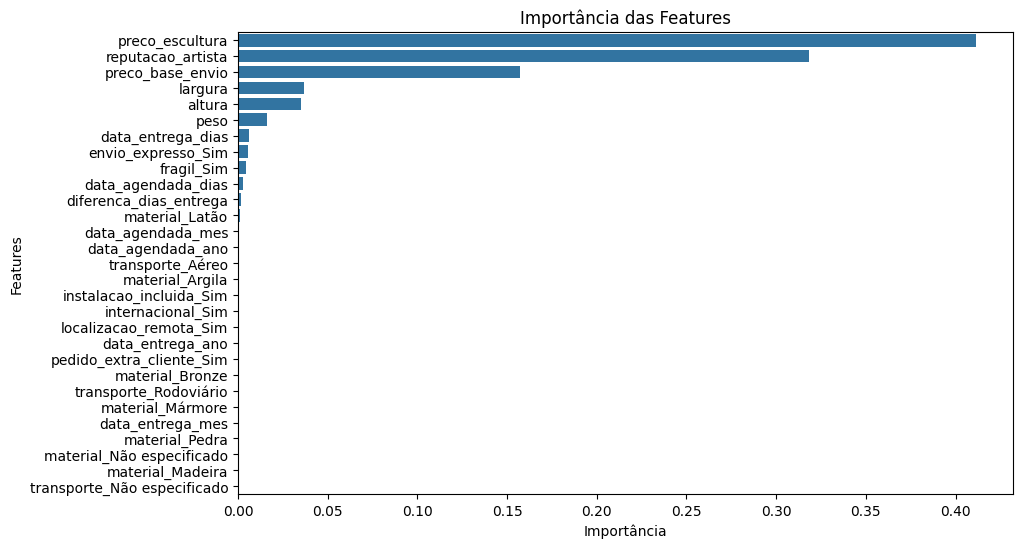

In [ ]:
importances = pd.DataFrame(
    {
        'Features': dtr2.feature_names_in_,
        'Importância': dtr2.feature_importances_
    }
).sort_values(by = 'Importância', ascending = False)

plt.figure(figsize = (10, 6))
sns.barplot(x = 'Importância', y = 'Features', data = importances)
plt.title('Importância das Features');

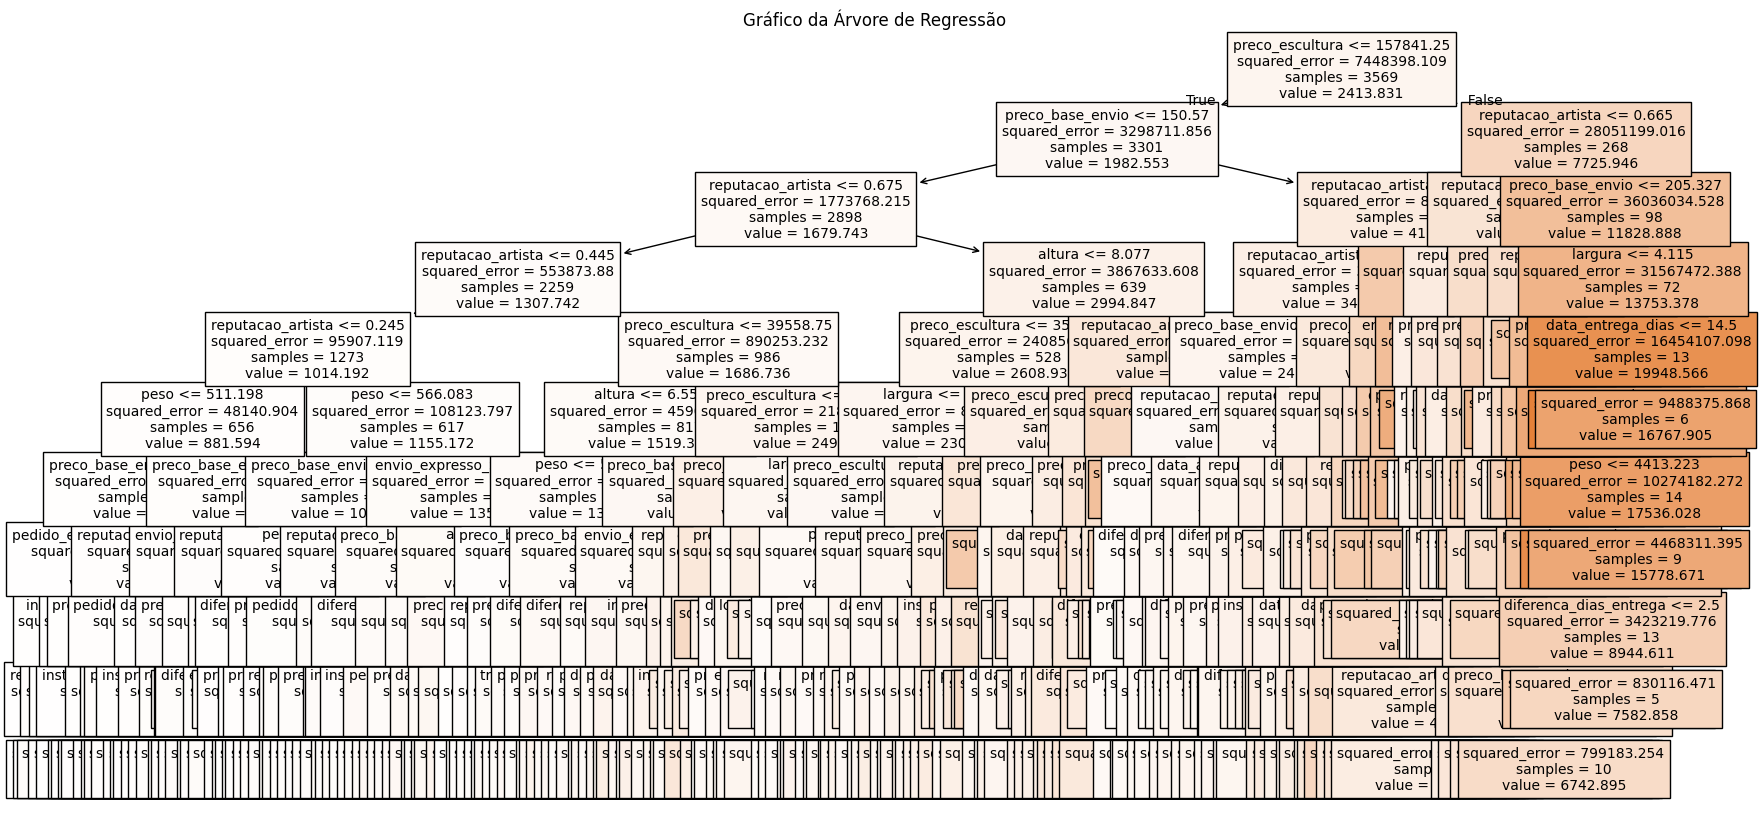

In [ ]:
plt.figure(figsize = (20, 10))
tree = plot_tree(dtr2, feature_names = x.columns, filled = True, fontsize = 10)
plt.title('Gráfico da Árvore de Regressão');

#### Residuos

In [ ]:
resid = y_test - y_pred

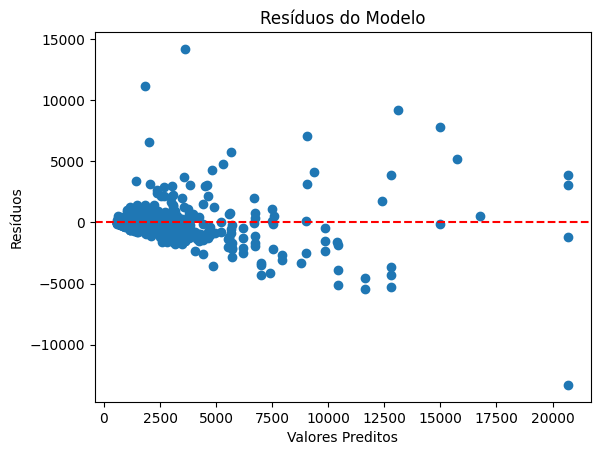

In [ ]:
plt.scatter(y_pred, resid)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Resíduos do Modelo');

#### Floresta Aleatória de Regressão

##### Aplicação

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor(random_state = 45, oob_score = True)

In [ ]:
rfr.fit(x_train, y_train)

RandomForestRegressor(oob_score=True, random_state=45)

In [ ]:
print('Regression Report de Treino')
regression_report(y_train, rfr.predict(x_train))

Regression Report de Treino
__________________________

R²: 97.74 %

MAE: 183.92

MSE: 168513.66

RMSE: 410.50
__________________________


In [ ]:
print('Regression Report de Teste')
regression_report(y_test, rfr.predict(x_test))
print('\n\nPrevisão OOB R²:', rfr.oob_score_)

Regression Report de Teste
__________________________

R²: 82.25 %

MAE: 463.52

MSE: 1247924.72

RMSE: 1117.11
__________________________


Previsão OOB R²: 0.8284340726706725


In [ ]:
resultados = cross_validate(
    rfr,
    x,
    y,
    cv = cv,
    scoring = 'neg_mean_squared_error',
    return_train_score = True
)

In [ ]:
treino_rmse = np.sqrt(-resultados['train_score'])
teste_rmse = np.sqrt(-resultados['test_score'])
treino_mse = -resultados['train_score']
teste_mse = -resultados['test_score']

In [ ]:
print('----------------------------------------------------------------------------')
print('Resultados de treino:')
print('\nRMSE médio: {:.2f}'.format(treino_rmse.mean()))
print('MSE médio: {:.2f}'.format(treino_mse.mean()))
print('----------------------------------------------------------------------------')
print('Resultados de teste:')
print('\nRMSE médio: {:.2f}'.format(teste_rmse.mean()))
print('MSE médio: {:.2f}'.format(teste_mse.mean()))


----------------------------------------------------------------------------
Resultados de treino:

RMSE médio: 421.66
MSE médio: 177839.57
----------------------------------------------------------------------------
Resultados de teste:

RMSE médio: 1104.98
MSE médio: 1223177.50


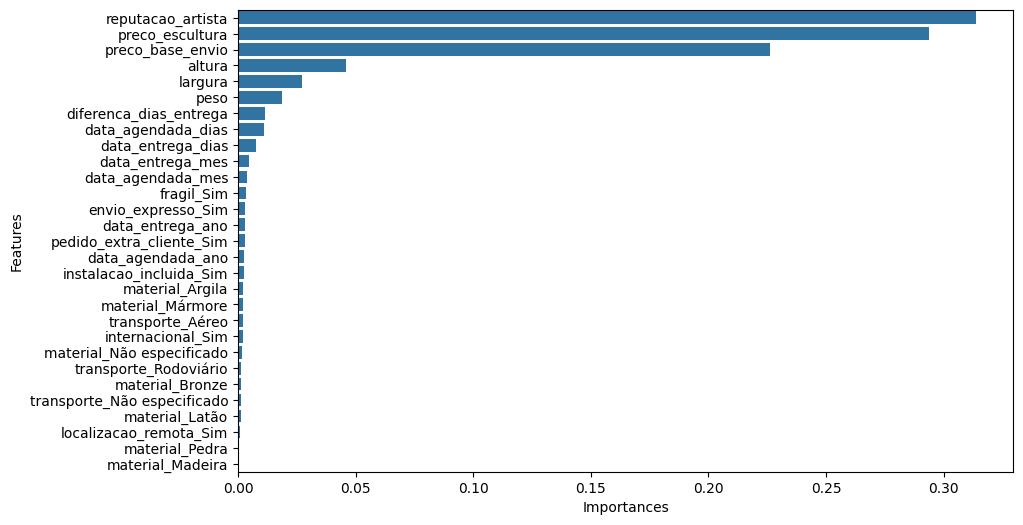

In [ ]:
importances = pd.DataFrame(
    {
        'Features': rfr.feature_names_in_,
        'Importances': rfr.feature_importances_
    }
).sort_values(by = 'Importances', ascending = False)

plt.figure(figsize = (10, 6))
sns.barplot(x = 'Importances', y = 'Features', data = importances);

In [ ]:
rfr.estimators_

[DecisionTreeRegressor(max_features=1.0, random_state=2100288459),
 DecisionTreeRegressor(max_features=1.0, random_state=1307974046),
 DecisionTreeRegressor(max_features=1.0, random_state=212792963),
 DecisionTreeRegressor(max_features=1.0, random_state=736499580),
 DecisionTreeRegressor(max_features=1.0, random_state=1208806944),
 DecisionTreeRegressor(max_features=1.0, random_state=1804481119),
 DecisionTreeRegressor(max_features=1.0, random_state=331956157),
 DecisionTreeRegressor(max_features=1.0, random_state=1963884245),
 DecisionTreeRegressor(max_features=1.0, random_state=1908981923),
 DecisionTreeRegressor(max_features=1.0, random_state=1780867652),
 DecisionTreeRegressor(max_features=1.0, random_state=2030694777),
 DecisionTreeRegressor(max_features=1.0, random_state=2065337976),
 DecisionTreeRegressor(max_features=1.0, random_state=208400399),
 DecisionTreeRegressor(max_features=1.0, random_state=943505985),
 DecisionTreeRegressor(max_features=1.0, random_state=701473166),
 

In [ ]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 45,
 'verbose': 0,
 'warm_start': False}

##### Tuning

In [ ]:
param_grid_rfr = {
    'max_depth': [None, 15, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 5],
    'max_leaf_nodes': [400, 550]
}

In [ ]:
rf = RandomForestRegressor(random_state = 45)

rfr_grid = GridSearchCV(rf,
                        param_grid = param_grid_rfr,
                        cv = cv,
                        scoring = 'neg_root_mean_squared_error',
                        n_jobs = -1)

In [ ]:
rfr_grid.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=45, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=-1,
             param_grid={'max_depth': [None, 15, 20],
                         'max_leaf_nodes': [400, 550],
                         'min_samples_leaf': [2, 5],
                         'min_samples_split': [2, 5]},
             scoring='neg_root_mean_squared_error')

In [ ]:
rfr_grid.best_params_

{'max_depth': None,
 'max_leaf_nodes': 550,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [ ]:
rfr2 = RandomForestRegressor(**rfr_grid.best_params_)

In [ ]:
rfr2.fit(x_train, y_train)

RandomForestRegressor(max_leaf_nodes=550, min_samples_leaf=2)

In [ ]:
regression_report(y_train, rfr2.predict(x_train))

__________________________

R²: 96.41 %

MAE: 226.76

MSE: 267236.94

RMSE: 516.95
__________________________


In [ ]:
regression_report(y_test, rfr2.predict(x_test))

__________________________

R²: 81.44 %

MAE: 466.00

MSE: 1304926.65

RMSE: 1142.33
__________________________


In [ ]:
resultados = cross_validate(
    rfr2,
    x,
    y,
    cv = cv,
    scoring = 'neg_mean_squared_error',
    return_train_score = True
)

In [ ]:
mse_treino = np.sqrt(-resultados['train_score'])
mse_teste = np.sqrt(-resultados['test_score'])
rmse_treino = np.sqrt(-resultados['train_score'])
rmse_teste = np.sqrt(-resultados['test_score'])

print('RMSE Treino: {}'.format(mse_treino))
print('RMSE Teste: {}'.format(mse_teste))
print('Média Treino RMSE {:.2f}'.format(rmse_treino.mean()))
print('Média Teste RMSE {:.2f}'.format(rmse_teste.mean()))

RMSE Treino: [504.54051769 517.47549022 511.15714439 493.80249193 504.30240855]
RMSE Teste: [1108.51260336 1043.80313496 1126.66416874 1128.9848153  1064.24599602]
Média Treino RMSE 506.26
Média Teste RMSE 1094.44


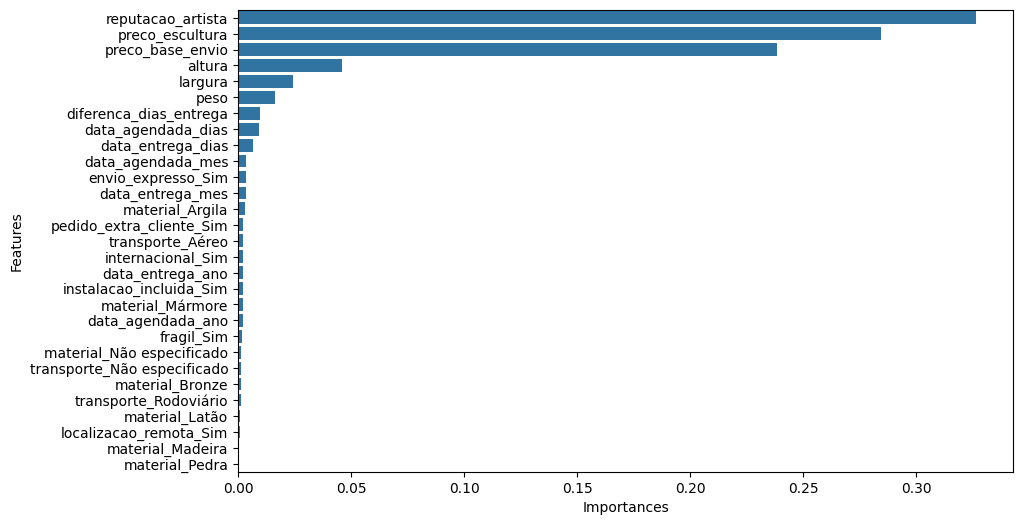

In [ ]:
importances = pd.DataFrame(
    {
        'Features': rfr2.feature_names_in_,
        'Importances': rfr2.feature_importances_
    }
).sort_values(by = 'Importances', ascending = False)

plt.figure(figsize = (10, 6))
sns.barplot(x = 'Importances', y = 'Features', data = importances);

#### Prevendo novos dados

In [ ]:
prever = pd.read_csv(url_teste)

In [ ]:
prever = x_train[x_train.columns] #reordena as colunas para que siga a ordem que foi usada no fit

In [ ]:
custos = rfr2.predict(prever)

In [ ]:
prever['custos'] = custos

In [ ]:
prever

,reputacao_artista,altura,largura,peso,preco_escultura,preco_base_envio,diferenca_dias_entrega,data_agendada_dias,data_agendada_mes,data_agendada_ano,...,internacional_Sim,envio_expresso_Sim,instalacao_incluida_Sim,transporte_Aéreo,transporte_Não especificado,transporte_Rodoviário,fragil_Sim,pedido_extra_cliente_Sim,localizacao_remota_Sim,custos
2316,0.47000,8.8392,1.8288,74.842680,20160.0,130.8825,2,22,3,2019,...,True,True,True,True,False,False,False,False,False,1918.474260
2730,0.16000,2.4384,1.5240,1407.042384,24360.0,120.5400,-4,17,6,2022,...,False,False,False,False,False,False,False,True,False,1006.817050
2399,0.22000,3.3528,1.8288,590.576784,32130.0,87.1500,3,12,1,2022,...,False,False,False,False,False,False,False,True,False,876.263021
2027,0.01000,7.9248,4.5720,919.884576,32917.5,93.4500,1,24,2,2023,...,True,True,False,True,False,False,False,False,False,933.342283
2909,0.46185,6.0960,1.2192,2048.875064,48300.0,89.3550,-1,9,9,2022,...,False,False,True,False,False,True,False,True,True,2466.601469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,0.58000,2.4384,1.2192,165.561080,27510.0,89.7225,4,15,10,2021,...,False,True,False,True,False,False,False,True,True,1273.861407
3704,0.49000,12.1920,4.8768,393.264264,32602.5,61.7925,3,5,1,2023,...,True,False,True,False,False,False,False,False,False,1561.562700
580,0.70000,7.3152,2.7432,694.449352,42892.5,115.2375,-4,29,9,2019,...,True,False,False,True,False,False,True,True,False,4914.291589
163,0.30000,6.0960,2.7432,136.531192,16537.5,97.0200,-2,10,10,2022,...,True,True,True,False,True,False,False,True,False,1064.603417


In [ ]:
novos_dados = prever.copy()

In [ ]:
novos_dados.to_csv('precos_entregas.csv', index = False)